The Sign Language MNIST dataset offers a challenging alternative to the classic MNIST dataset, focusing on 24 American Sign Language (ASL) hand gestures, excluding 'J' and 'Z' due to their motion requirements. It mirrors the original MNIST structure, with 28x28 grayscale images flattened into rows, but presents added complexity due to gesture variations and inter-class similarity.
___

Mounted at /content/drive


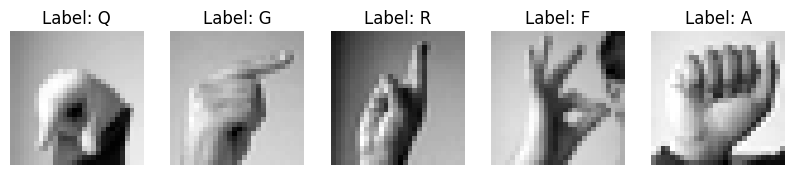

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt


drive.mount('/content/drive')

# Load the dataset
train_data_path = "/content/drive/MyDrive/Datasets/Sign_Language_MNIST/sign_mnist_train.csv"  # Replace with the path to the training dataset CSV file
test_data_path = "/content/drive/MyDrive/Datasets/Sign_Language_MNIST/sign_mnist_test.csv"    # Replace with the path to the test dataset CSV file

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Separate labels and pixel values
train_labels = train_data.iloc[:, 0].values  # First column contains the labels
train_images = train_data.iloc[:, 1:].values  # Remaining columns contain the pixel values

# Normalize the pixel values (optional but recommended)
train_images = train_images / 255.0

# Visualize random images
def plot_random_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        idx = np.random.randint(0, len(images))  # Pick a random image
        image = images[idx].reshape(28, 28)  # Reshape to 28x28
        label = labels[idx]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {chr(label + 65)}")  # Convert label (0-25) to letter (A-Z)
        plt.axis('off')
    plt.show()

# Plot 5 random images from the training set
plot_random_images(train_images, train_labels)


In [5]:
# Overview of the dataset
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


> **Dataset Overview:**  
>The training set at approximately 80% of the complete dataset contains 27,455 instances of many image variations and 784 features (1 label column).  
_Class Labels_ are 24 integers (0-23), corresponding to letters A-Y (excluding J and Z due to their representation requiring motion).
>
>Training Data Shape:  [27,455 , 785]  
>Test Data Shape:  [7,172 , 785]  


In [10]:
miss = train_data.isnull().values.any()
print(f"Missing values: {miss}")
print("Dataset Shape:", train_data.shape)
print("Test Dataset Shape:", test_data.shape)
print("Unique Labels:", train_data['label'].nunique())

Missing values: False
Dataset Shape: (27455, 785)
Test Dataset Shape: (7172, 785)
Unique Labels: 24


> Pixel Values:
Here we make inferences with the pixel values such as _Mean Intensity_ (145-1656), and _STD Intensity_ (31-65). A range of 0-255 indicates _grayscale images_. Values are normalized to the range [0, 1] for training.

In [11]:
# Summary of pixel values
pixel_summary = train_data.iloc[:, 1:].describe()
pixel_summary


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,148.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,167.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,186.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


> The Distribution here is relatively balanced with slight variations across classes

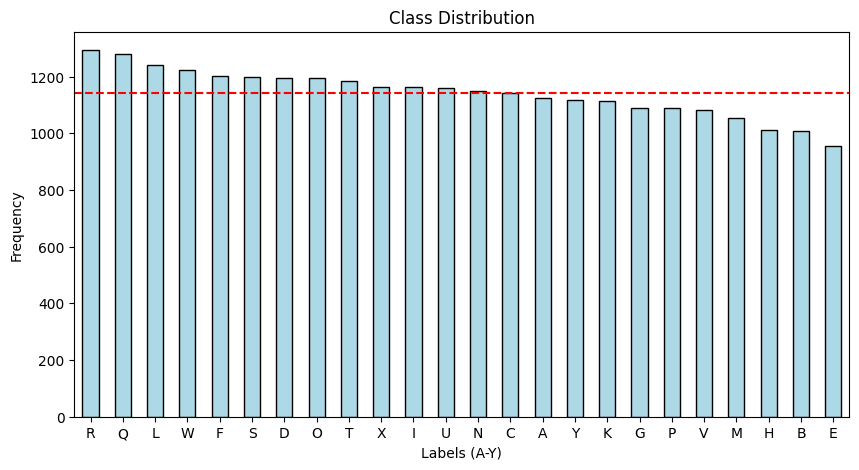

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for class distribution
class_distribution = train_data['label'].value_counts()

# Convert labels to letters (A-Z)
class_distribution.index = class_distribution.index.map(lambda x: chr(x + 65))

# Visualize the class distribution
class_distribution.plot(kind='bar', figsize=(10, 5), color='lightblue', edgecolor='black', title='Class Distribution')
plt.xlabel('Labels (A-Y)')
plt.axhline(y=class_distribution.mean(), color='red', linestyle='--', label='Mean Count')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


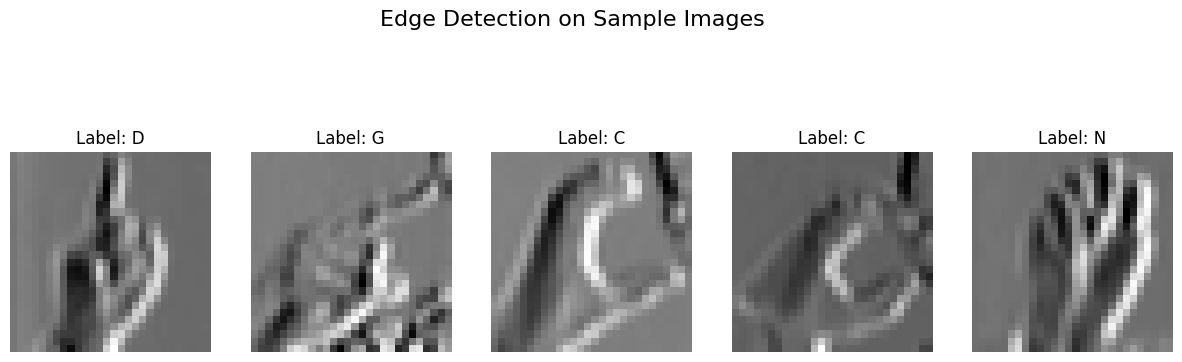

In [28]:
from scipy.ndimage import sobel

sample_images = train_images[:5]
plt.figure(figsize=(15, 5))
for i, image in enumerate(sample_images):
    image_reshaped = image.reshape(28, 28)
    edge_image = sobel(image_reshaped)
    plt.subplot(1, 5, i + 1)
    plt.imshow(edge_image, cmap='gray')
    plt.title(f'Label: {chr(train_labels[i] + 65)}')
    plt.axis('off')
plt.suptitle('Edge Detection on Sample Images', fontsize=16)
plt.show()


In [31]:
import pandas as pd
import seaborn as sns

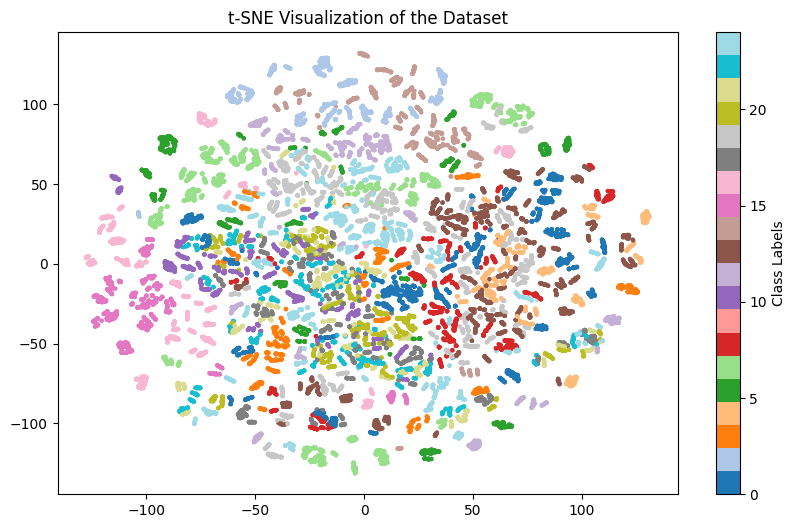

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50).fit_transform(train_images)  # Reduce to 50 dimensions
tsne = TSNE(n_components=2, random_state=42).fit_transform(pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne[:, 0], tsne[:, 1], c=train_labels, cmap='tab20', s=5)
plt.colorbar(scatter, label='Class Labels')
plt.title('t-SNE Visualization of the Dataset')
plt.show()


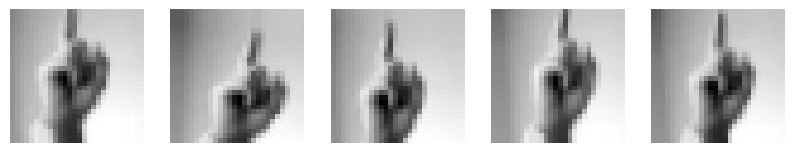

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation strategy
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Example: augment a random image
sample_image = train_images[0].reshape(28, 28, 1)  # Add channel dimension
sample_image = np.expand_dims(sample_image, 0)  # Batch dimension
aug_iter = datagen.flow(sample_image)

# Visualize augmented images
plt.figure(figsize=(10, 2))
for i in range(5):
    aug_image = next(aug_iter)[0]
    plt.subplot(1, 5, i + 1)
    plt.imshow(aug_image.squeeze(), cmap="gray")
    plt.axis("off")
plt.show()


In [ ]:
!jupyter nbconvert --to pdf